## Notebook 3 : Correlations and relationship between variables

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [2]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_rv = pd.read_csv('df_complete.csv')

df_rv.head()

C:\Users\Ilian\AppData\Local\Temp\ipykernel_22732\2174705646.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rv = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [3]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_rv[category_convert] = df_rv[category_convert].astype('category')

df_rv['Date mutation'] = pd.to_datetime(df_rv['Date mutation'], errors = 'coerce')
df_rv['Date mutation'] = df_rv['Date mutation'].interpolate(method='linear')

df_rv['Valeur fonciere']=df_rv['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_rv['Valeur fonciere']=pd.to_numeric(df_rv['Valeur fonciere'], errors='coerce')

df_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [4]:
#### CHECK MISSING VALUES ####
df_rv.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [5]:
#### CHECK DUPLICATES ####
#df_rv.drop_duplicates(keep='last', inplace=True)
df_rv.duplicated().sum()

0

In [6]:
df_rv.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze correlations between various variables (price vs. surface area, price vs. number of rooms, etc.).
- Study how certain factors (terrain size, property type) affect property values.

In [7]:
#### LIBRARIES ####
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import random



In [8]:

#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_rv['Valeur fonciere'].quantile(0.25)
Q3 = df_rv['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_rv[(df_rv['Valeur fonciere'] < lower_bound) | (df_rv['Valeur fonciere'] > upper_bound)].copy()
non_outliers = df_rv[(df_rv['Valeur fonciere'] >= lower_bound) & (df_rv['Valeur fonciere'] <= upper_bound)].copy()

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019


In [9]:
non_outliers.head()
non_outliers['Nature mutation'].unique()
non_outliers[non_outliers['Code departement']==976].head()



,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee


Data exploration of multivariable : ungraphical and graphical variable

In [10]:
# Statistique data of non_outliers
colummns_stat = ['Valeur fonciere','Surface reelle bati','Surface terrain']
mean = non_outliers[colummns_stat].mean()
maxi = non_outliers[colummns_stat].max()
mini = non_outliers[colummns_stat].min()
median = non_outliers[colummns_stat].median()

stat_columns = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
stat_columns.index.name='feature name'

stat_columns.head()

,mean,median,max,min
feature name,,,,
Valeur fonciere,163822.060283,138650.0,606250.0,0.0
Surface reelle bati,36.465759,0.0,450000.0,0.0
Surface terrain,1829.699058,287.0,10723091.0,0.0


In [11]:
# Statistique data of outliers
colummns_stat_outliers = ['Valeur fonciere','Surface reelle bati','Surface terrain']
mean = outliers[colummns_stat].mean()
maxi = outliers[colummns_stat].max()
mini = outliers[colummns_stat].min()
median = outliers[colummns_stat].median()

colummns_stat_outliers = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
colummns_stat_outliers.index.name='feature name'

colummns_stat_outliers.head()

,mean,median,max,min
feature name,,,,
Valeur fonciere,5.559429e+06,1030000.0,1.415000e+10,606255.0
Surface reelle bati,1.446187e+02,0.0,3.129620e+05,0.0
Surface terrain,3.797640e+03,500.0,6.032439e+06,0.0


### Which point is important for an investor ?
   * A good price : If the land value is below the market average, it can give a higher added value potential

        - Which type of good is the best to invest (historigramme per type location) ?

        - Look at the type of local that are the best to invest.
             * Do you want to invest in empty area ?  
           If empty area is in there, make a comparaison in fonction of the surface
             * Those are the area with a land value below the average price in function of the surface area. Is there a goods with the same scale of surface but with a construction ?
           Look other type that are in the plage of surfaces below the mean_land_price

        - OK, those goods same to be a better investment than empty area because I just have to pay the renovation:
             * But wich type of building should I invest in ?
            Look a the building in function of the surface of the building (Compare the price with the bigger building. If some have the same height but are cheaper, keep the cheaper. And look at other why they don't have the same price)

        - Those one have the same plage of surfaces et the added value is good. Why this difference in price ?
            * Look at the number of main room *****************

        - I want to look at the building that are above and below the median surfaces and compare it with the tax transfère.
           * Calculate the transfert tax and add a columns with the sum of tax and added value.
           * Wich of the bigger building have less taxes ? Wich of the smaller building have less taxes ?

        - If you just take the price into account you will have all those small building but you also have those bigger building with the smaller taxes.
           * Compare in a heat map the quality of the good in function of the price_sum and surface.
           * Look if there is bigger building (x) that have the same plage of price (near the median) as smaller building (o)
           * Differenciate the type of local by color

### Analyse of the tax transfert
Calcule du droit de mutation en fonction de la nature de la mutation.

- For those type of mutation (case 1) : 'Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication'

   * Formule generale (For all departments) : Valeur foncière x (4.5% + 1.2%) x 1.0237
   * Formule exception (departemnt : 36, 56) : Valeur foncière x (3.8% + 1.2%) x 1.0237

- For those type of mutation (case 2) : 'Vente en l'état futur d'achèvement'
   * Formule generale (For all departments) : Valeur foncière x 0.715%

- For those type of mutation (case 3) : 'Expropriation'
   * Vari in function of the type of exportation:
       - Formule generale (For all departments) + Formule exception (departemnt : 36, 56)
       - Delete the tax
       - Reduce the tax



In [12]:
#Calcul the tax transfert

#List of columns in function of the different case
columns_c1 = ['Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication']
columns_c2 = ["Vente en l'état futur d'achèvement"]

def tax_transfert_exp_null(df):

    #Columns that can change the formula
    valeur_fonciere = df['Valeur fonciere']
    code_dept = df['Code departement']
    nature_mutation = df['Nature mutation']

    #Calculate tax
    tax_dept = 4.5/100 if code_dept not in [36, 56] else 3.8/100
    tax_comm = 1.2/100

    if nature_mutation in columns_c1:
        return valeur_fonciere * (tax_dept + tax_comm) * 1.0237
    elif nature_mutation in columns_c2:
        return valeur_fonciere * 0.715/100
    else :
        return 0
    
non_outliers['Droit de mutation'] = outliers.apply(tax_transfert_exp_null, axis=1)

non_outliers['Droit de mutation'] = non_outliers.apply(tax_transfert_exp_null, axis=1)
non_outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,14249.289780
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,11378.425500
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,11378.425500
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,6420.349527
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,9362.401905


In [13]:
df_sum = non_outliers[non_outliers['Valeur fonciere']==0]
print("numbernof items with land value equal to 0:",len(df_sum))


numbernof items with land value equal to 0: 70708


In [14]:
outliers['Droit de mutation'] = outliers.apply(tax_transfert_exp_null, axis=1)
outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019,175052.7000
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,175052.7000
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019,36469.3125
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019,36469.3125
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019,36469.3125


In [15]:
#Add a columns that calculate the sum of land value and tax.
outliers['Valeur fonciere + tax de mutation'] = outliers['Droit de mutation'] + outliers['Valeur fonciere']
outliers.head()

non_outliers['Valeur fonciere + tax de mutation'] = non_outliers['Droit de mutation'] + non_outliers['Valeur fonciere']
non_outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation,Valeur fonciere + tax de mutation
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,14249.289780,258449.289780
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,11378.425500,206378.425500
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,11378.425500,206378.425500
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,6420.349527,116450.349527
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,9362.401905,169812.401905


## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Heatmap of correlations between variables.
- Scatter plots to visualize relationships between certain variables, such as built area and property value.

## Which type of good is the best to invest (historigramme per type location) ?

Look at the relationshipe between the land value and the type of local
Make comparaison between the local that are above or below the land value to estimate the added value.

In [16]:
# Filtrer les habitations dont la surface et la valeur foncière sont égale à zéro
non_outliers_not_empty = non_outliers[non_outliers['Surface terrain']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Valeur fonciere']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Surface reelle bati']!=0.0]

print(non_outliers.shape)
print(non_outliers_not_empty.shape)

(16452481, 17)
(3678482, 17)


<Figure size 4000x1500 with 0 Axes>

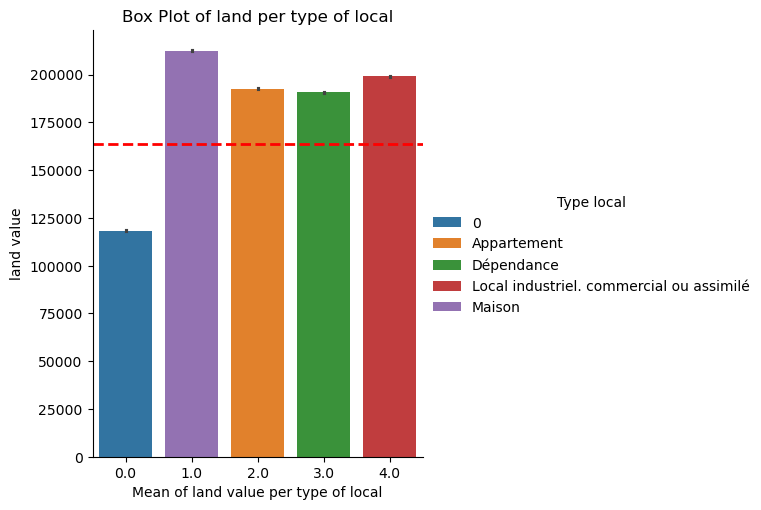

In [17]:
#### non_outliers #########
#Calculate the mean of land value per type of location

#Create box plot
plt.figure(figsize=(40,15))
sns.catplot(data=non_outliers, x='Code type local', y='Valeur fonciere', 
    hue='Type local', 
    kind="bar", legend="brief")


#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Box Plot of land per type of local")
plt.xlabel("Mean of land value per type of local")
plt.ylabel("land value")
plt.show()

En calculant la moyen de valeur foncière de chaque type de local, on observe que seul les terrain vide se trouve en dessous de la moyen de la valeur du marché. 
Cela montre que la présence d'une construction influe sur la valeur du bien.

<Figure size 4000x1500 with 0 Axes>

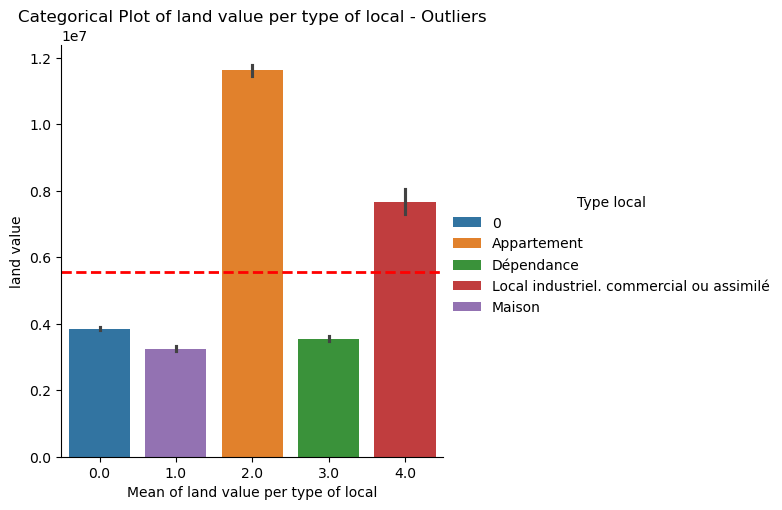

In [18]:
#### outliers #########
#Calculate the mean of land value per type of location

#Create box plot
plt.figure(figsize=(40,15))
sns.catplot(data=outliers, x='Code type local', y='Valeur fonciere', 
    hue='Type local', 
    kind="bar", legend="brief")


#Create horizontale line that are the mean of land value
mean_land_value = colummns_stat_outliers.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Categorical Plot of land value per type of local - Outliers")
plt.xlabel("Mean of land value per type of local")
plt.ylabel("land value")
plt.show()

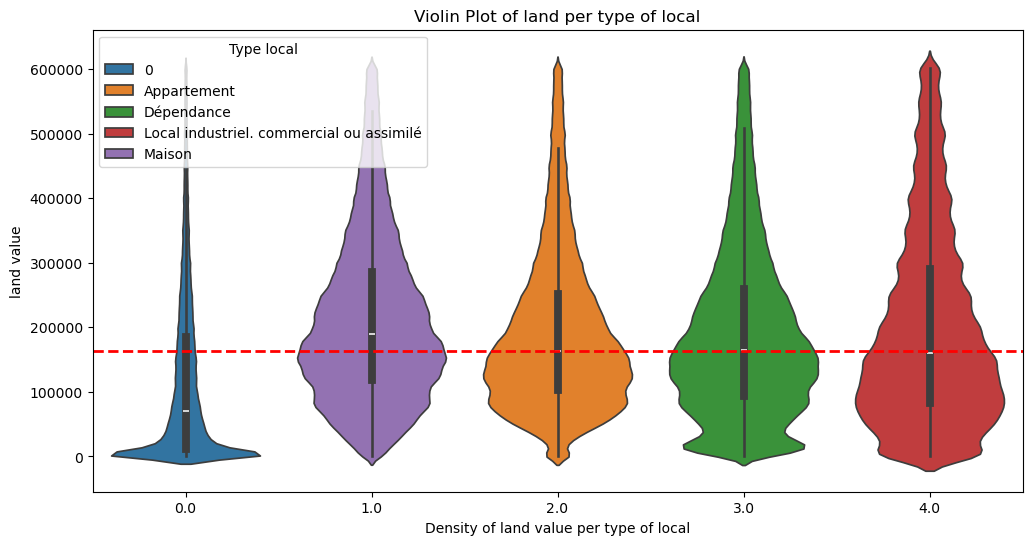

In [19]:
#### non_outliers #########
#Density of land value per type of location

#Create box plot
plt.figure(figsize=(12,6))
sns.violinplot(data=non_outliers, x='Code type local', y='Valeur fonciere', hue='Type local')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Violin Plot of land per type of local")
plt.xlabel("Density of land value per type of local")
plt.ylabel("land value")
plt.show()

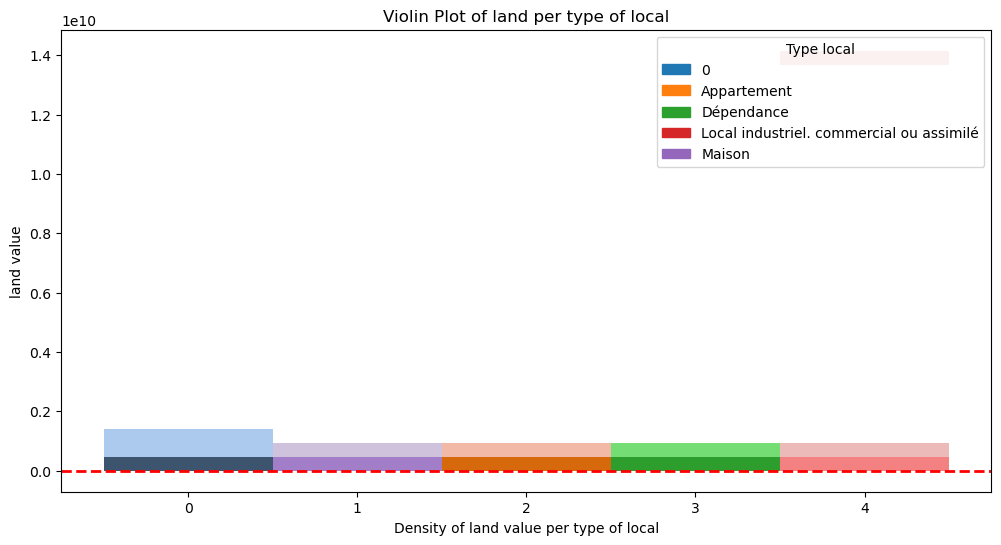

In [20]:
#### outliers #########
#Density of land value per type of location

#Create box plot
plt.figure(figsize=(12,6))
sns.histplot(data=outliers, x='Code type local', y='Valeur fonciere', hue='Type local', bins=30, cmap='viridis')

#Create horizontale line that are the mean of land value
mean_land_value = colummns_stat_outliers.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Violin Plot of land per type of local")
plt.xlabel("Density of land value per type of local")
plt.ylabel("land value")
plt.show()

In this Categorical plot, we make the same comparaison as the previous one. We compare the land value per local type. But in this one we only have outliers. We studie if some type are below the mean of the market and then have some good added value. We can see that three of them are below the mean of the land value. They are goods with building in it or not. And the empties area are not the cheapest. 
So we can suppose that the type of local doesn't influence much the value of a good.

Advice for investor : 
  - When you choose where to invest, you don't need to take into account the type of local.

In [21]:
max_surface = stat_columns.loc['Surface terrain','max']
min_surface = stat_columns.loc['Surface terrain','min']
bins = np.linspace(min_surface, max_surface, num=15)

non_outliers['surface en plage']= pd.cut(non_outliers['Surface terrain'], bins=bins, include_lowest=True)
non_outliers['surface en plage'] = non_outliers['surface en plage'].astype(str)
        

## Analyse of the number of room

/var/folders/4w/14ckvblj1yxd9ft8451k6lhc0000gn/T/ipykernel_1201/2936343930.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


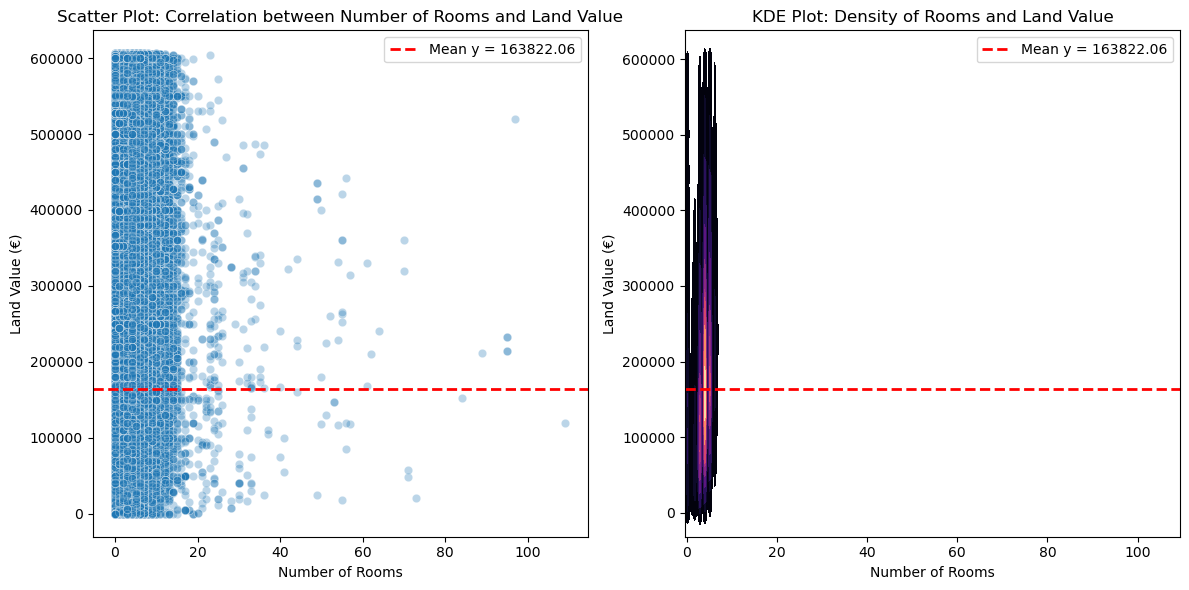

In [60]:
###### non outlier ######
# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- Scatter plot (ax1) ---
sns.scatterplot(
    data=non_outliers_not_empty,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    alpha=0.3,
    ax=ax1
)

# Add horizontale line that show the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
ax1.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Add labels and title
ax1.set_title("Scatter Plot: Correlation between Number of Rooms and Land Value")
ax1.set_xlabel("Number of Rooms")
ax1.set_ylabel("Land Value (€)")
ax1.legend()

# --- KDE plot (ax2) ---
sns.kdeplot(
    data=non_outliers_not_empty,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    fill=True,
    cmap='magma',
    ax=ax2
)

# Ajouter une ligne horizontale représentant la moyenne de la valeur foncière
ax2.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Ajouter des labels et un titre
ax2.set_title("KDE Plot: Density of Rooms and Land Value")
ax2.set_xlabel("Number of Rooms")
ax2.set_ylabel("Land Value (€)")
ax2.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [ ]:
#### non outliers ####
# General view : number of room

#Create hexbin plot
plt.figure(figsize=(12,6))
sns.kdeplot(data=non_outliers_not_empty, x='Nombre pieces principales', y='Valeur fonciere', fill=True, cmap='magma')
#Create horizontale line that are the mean of land value

mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Correlation between the number of room and the land value ")
plt.xlabel("number of rooms")
plt.ylabel("land value")
plt.show()

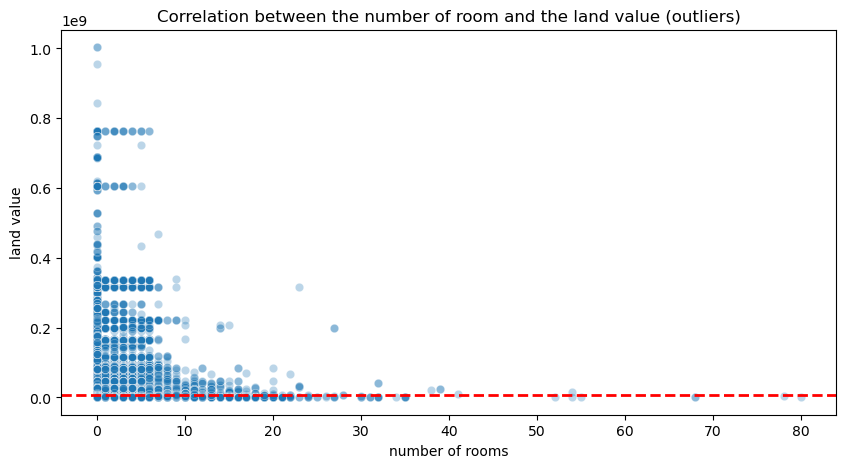

In [ ]:
#### outliers ####
# General view : number of room
outliers2 = outliers[outliers['Valeur fonciere']<outliers['Valeur fonciere'].max()]
#Create hexbin plot
plt.figure(figsize=(10,5))
#sns.kdeplot(data=non_outliers_not_empty, x='Nombre pieces principales', y='Valeur fonciere', fill=True, cmap='magma')
sns.scatterplot(data=outliers2, x='Nombre pieces principales', y='Valeur fonciere', alpha=0.3)
#Create horizontale line that are the mean of land value

mean_land_value = colummns_stat_outliers.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Correlation between the number of room and the land value (outliers)")
plt.xlabel("number of rooms")
plt.ylabel("land value")
plt.show()

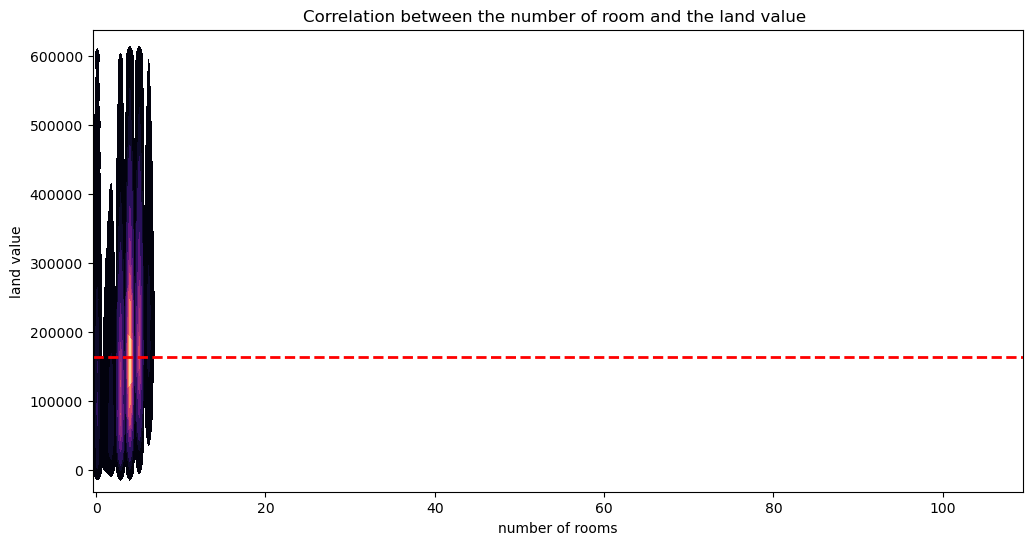

In [ ]:
#### outliers ####
# General view : number of room

#Create hexbin plot
plt.figure(figsize=(12,6))
sns.kdeplot(data=outliers2, x='Nombre pieces principales', y='Valeur fonciere', fill=True, cmap='magma')
#Create horizontale line that are the mean of land value

mean_land_value = colummns_stat_outliers.loc['Valeur fonciere', 'mean']
plt.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Correlation between the number of room and the land value ")
plt.xlabel("number of rooms")
plt.ylabel("land value")
plt.show()

ValueError: Contour levels must be increasing

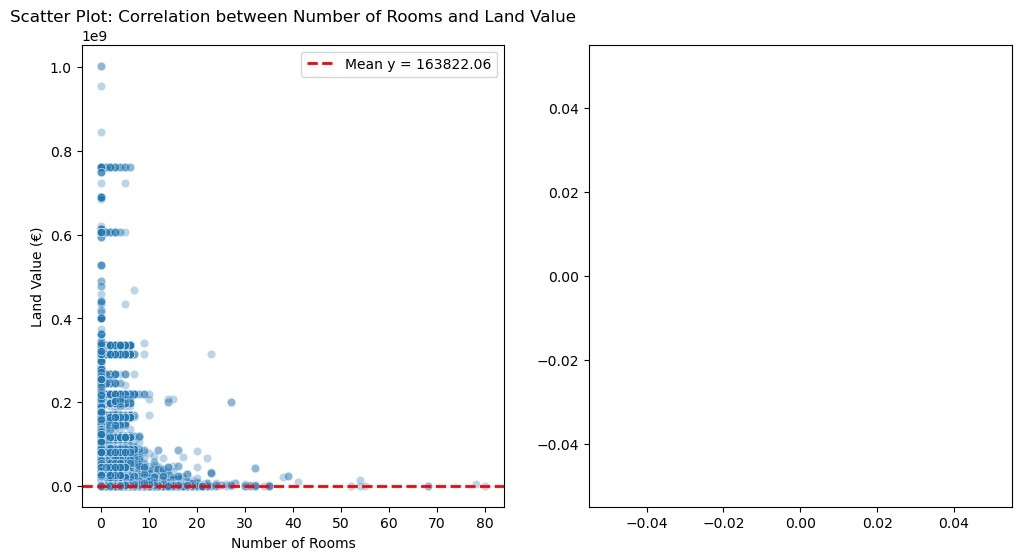

In [102]:
###### non outlier ######
# Create subplot
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(12, 6))
outliers2 = outliers[outliers['Valeur fonciere']<outliers['Valeur fonciere'].max()]

# --- Scatter plot (ax1) ---
sns.scatterplot(
    data=outliers2,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    alpha=0.3,
    ax=axi1
)

# Add horizontale line that show the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axi1.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Add labels and title
axi1.set_title("Scatter Plot: Correlation between Number of Rooms and Land Value")
axi1.set_xlabel("Number of Rooms")
axi1.set_ylabel("Land Value (€)")
axi1.legend()

# --- KDE plot (ax2) ---
sns.kdeplot(
    data=outliers2,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    fill=True,
    cmap='magma',
    ax=axi2
)

# Ajouter une ligne horizontale représentant la moyenne de la valeur foncière
axi2.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Ajouter des labels et un titre
axi2.set_title("KDE Plot: Density of Rooms and Land Value")
axi2.set_xlabel("Number of Rooms")
axi2.set_ylabel("Land Value (€)")
axi2.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

## Analyse of the land value in function of surfaces
- Buildind surfaces
- Area surfaces

In [ ]:
# Filtrer les habitations dont la surface et la valeur foncière sont égale à zéro
non_outliers_not_empty = non_outliers[non_outliers['Surface terrain']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Valeur fonciere']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Surface reelle bati']!=0.0]

print(non_outliers.shape)
print(non_outliers_not_empty.shape)

(16452481, 18)
(3678482, 18)


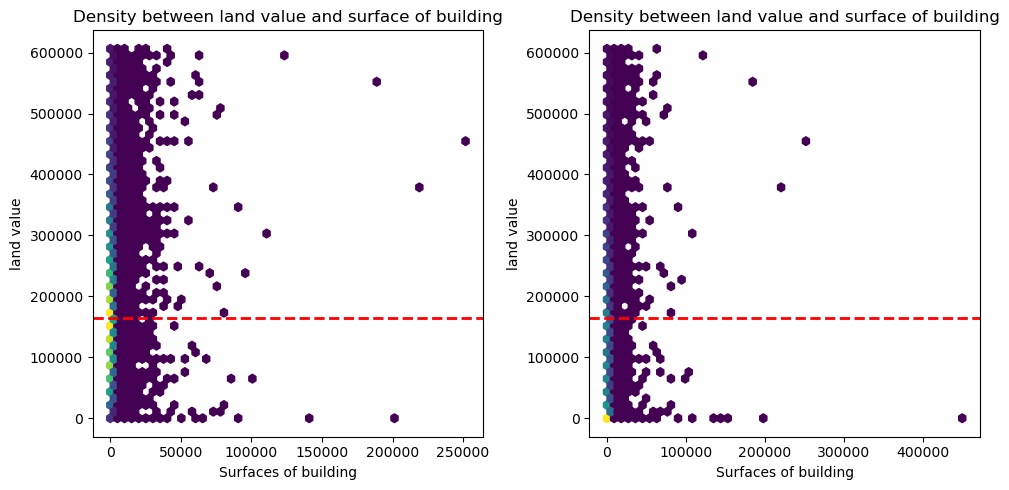

In [84]:
from matplotlib import colors

#Create frame with 1 row and 2 columns
figure, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))

axis1.hexbin(non_outliers_not_empty['Surface reelle bati'], non_outliers_not_empty['Valeur fonciere'], gridsize=50, mincnt=1)

mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axis1.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

# create a single norm to be shared across all images
#norm = colors.Normalize(vmin=np.min(non_outliers_not_empty), vmax=np.max(non_outliers_not_empty))
#plt.colorbar(mappable=cm.ScalarMappable(norm=norm),label='Density', ax=axis1)

axis1.set_title("Density between land value and surface of building")
axis1.set_xlabel("Surfaces of building")
axis1.set_ylabel("land value")


axis2.hexbin(non_outliers['Surface reelle bati'], non_outliers['Valeur fonciere'], gridsize=50, mincnt=1)
#norm = colors.Normalize(vmin=np.min(non_outliers_not_empty), vmax=np.max(non_outliers_not_empty))
#plt.colorbar(mappable=cm.ScalarMappable(norm=norm),label='Density', ax=axis1)

axis2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")


axis2.set_title("Density between land value and surface of building")
axis2.set_xlabel("Surfaces of building")
axis2.set_ylabel("land value")


plt.tight_layout()
plt.show()


View per local type

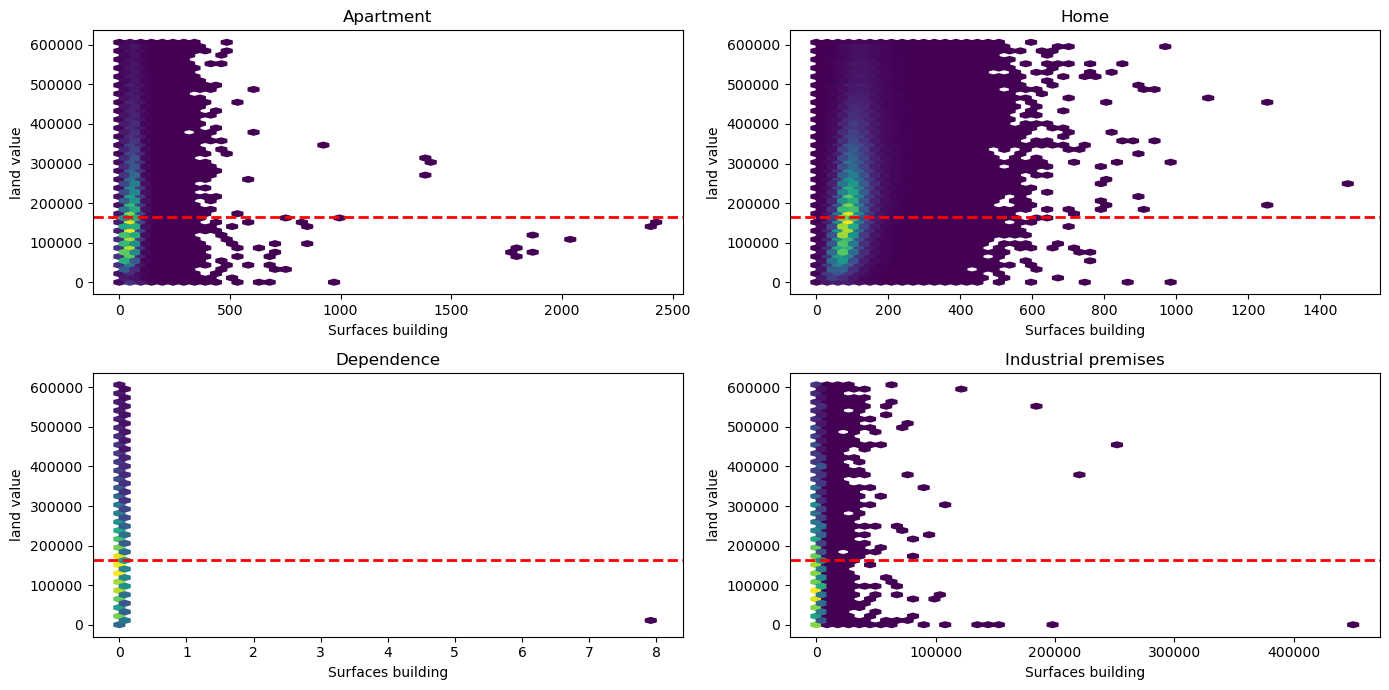

In [95]:
fig1, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize=(14,7))
plt.title("Density between land value and surface ", loc='center')

# -----Subplot Apartement ----- #
appartement = non_outliers[non_outliers['Type local']=='Appartement']

#Create hexbin plot
axs1.hexbin(appartement['Surface reelle bati'], appartement['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs1.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs1.set_title('Apartment')
axs1.set_xlabel("Surfaces building")
axs1.set_ylabel("land value")

# -----Subplot Home ----- #
maison = non_outliers[non_outliers['Type local']=='Maison']

#Create hexbin plot
axs2.hexbin(maison['Surface reelle bati'], maison['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
axs2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs2.set_title('Home')
axs2.set_xlabel("Surfaces building")
axs2.set_ylabel("land value")

# -----Subplot Dependence ----- #
dependance = non_outliers[non_outliers['Type local']=='Dépendance']

#Create hexbin plot
axs3.hexbin(dependance['Surface reelle bati'], dependance['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
axs3.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs3.set_title('Dependence')
axs3.set_xlabel("Surfaces building")
axs3.set_ylabel("land value")

# -----Subplot Industi premise ----- #
Local_industri = non_outliers[non_outliers['Type local']=='Local industriel. commercial ou assimilé']

#Create hexbin plot
axs4.hexbin(Local_industri['Surface reelle bati'], Local_industri['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs4.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs4.set_title('Industrial premises')
axs4.set_xlabel("Surfaces building")
axs4.set_ylabel("land value")

#Add label
plt.tight_layout()
plt.show()

Land surfaces

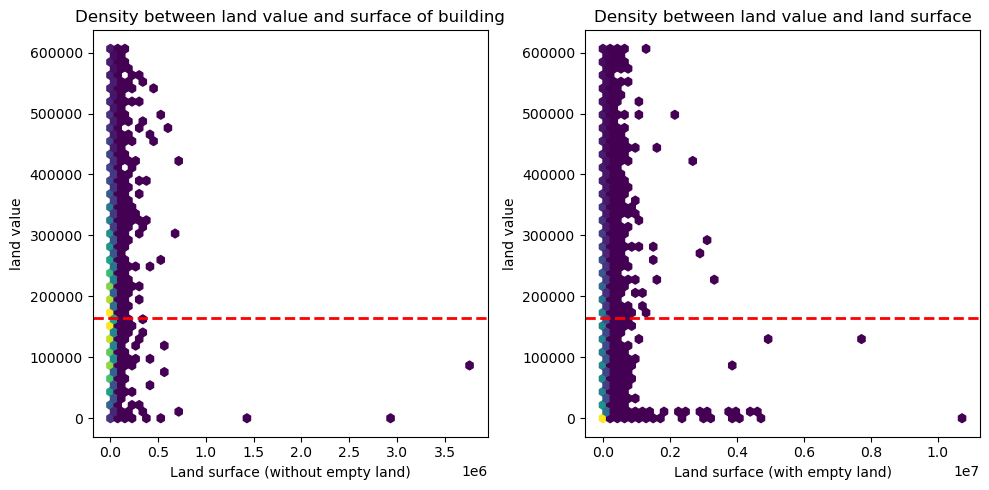

In [ ]:
#### non outliers ####
# General view : Land surfaces

#Create frame with 1 row and 2 columns
figure, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))

axis1.hexbin(non_outliers_not_empty['Surface terrain'], non_outliers_not_empty['Valeur fonciere'], gridsize=50, mincnt=1)

mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axis1.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

# create a single norm to be shared across all images
#norm = colors.Normalize(vmin=np.min(non_outliers_not_empty), vmax=np.max(non_outliers_not_empty))
#plt.colorbar(mappable=cm.ScalarMappable(norm=norm),label='Density', ax=axis1)

axis1.set_title("Density between land value and surface of building")
axis1.set_xlabel("Land surface (without empty land)")
axis1.set_ylabel("land value")


axis2.hexbin(non_outliers['Surface terrain'], non_outliers['Valeur fonciere'], gridsize=50, mincnt=1)
#norm = colors.Normalize(vmin=np.min(non_outliers_not_empty), vmax=np.max(non_outliers_not_empty))
#plt.colorbar(mappable=cm.ScalarMappable(norm=norm),label='Density', ax=axis1)

axis2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")


axis2.set_title("Density between land value and land surface")
axis2.set_xlabel("Land surface (with empty land)")
axis2.set_ylabel("land value")


plt.tight_layout()
plt.show()


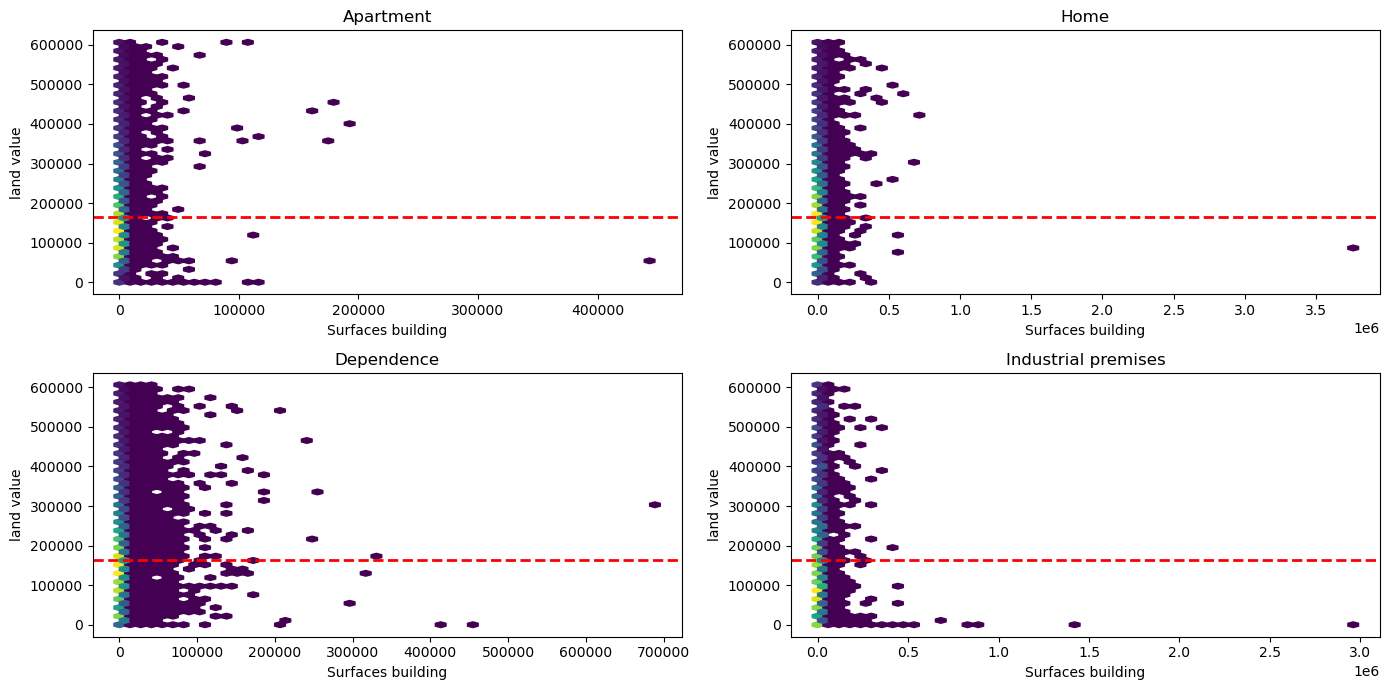

In [ ]:
### non outliers ####
#Specifique view : Area Surfaces

#Create frame with 2 row and 2 columns
fig1, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize=(14,7))
plt.title("Density between land value and surface ", loc='center')

# -----Subplot Apartement ----- #
appartement = non_outliers[non_outliers['Type local']=='Appartement']

#Create hexbin plot
axs1.hexbin(appartement['Surface terrain'], appartement['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs1.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs1.set_title('Apartment')
axs1.set_xlabel("land Surfaces")
axs1.set_ylabel("land value")

# -----Subplot Home ----- #
maison = non_outliers[non_outliers['Type local']=='Maison']

#Create hexbin plot
axs2.hexbin(maison['Surface terrain'], maison['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
axs2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs2.set_title('Home')
axs2.set_xlabel("land Surfaces")
axs2.set_ylabel("land value")

# -----Subplot Dependence ----- #
dependance = non_outliers[non_outliers['Type local']=='Dépendance']

#Create hexbin plot
axs3.hexbin(dependance['Surface terrain'], dependance['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
axs3.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs3.set_title('Dependence')
axs3.set_xlabel("land Surfaces")
axs3.set_ylabel("land value")

# -----Subplot Industi premise ----- #
Local_industri = non_outliers[non_outliers['Type local']=='Local industriel. commercial ou assimilé']

#Create hexbin plot
axs4.hexbin(Local_industri['Surface terrain'], Local_industri['Valeur fonciere'], gridsize=50, mincnt=1)

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs4.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

axs4.set_title('Industrial premises')
axs4.set_xlabel("land Surfaces")
axs4.set_ylabel("land value")

#Add label
plt.tight_layout()
plt.show()

## Analyse in function of the number of room

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Summarize significant relationships between variables that impact property values.
- Identify key factors to monitor when predicting property values.

Recommendations:
- Investment advice on what factors to prioritize when evaluating properties (e.g., emphasis on surface area or location).
- Suggestions for investing in areas where the correlation factors are favorable.